In [45]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [51]:
with open("polished_df.pkl", "rb") as fp:
    df = pickle.load(fp)

In [52]:
from sklearn.preprocessing import StandardScaler

1. AdaBoostClassifier

In [55]:
scaler = StandardScaler()

features_df = df.drop(['Decision'], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df),
                        index=features_df.index,
                        columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Splitting the Data
X = df.drop(['Decision'], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
# Importing the mdoel (this is the like in the model you would change for each model)
from sklearn.ensemble import AdaBoostClassifier

# Instantiating the model (also change this line)
clf = AdaBoostClassifier()

# Fitting the model
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

              precision    recall  f1-score   support

        Sell       0.38      0.06      0.10      2708
         Buy       0.47      0.39      0.42      5017
        Hold       0.47      0.71      0.57      6167

    accuracy                           0.47     13892
   macro avg       0.44      0.39      0.36     13892
weighted avg       0.45      0.47      0.42     13892



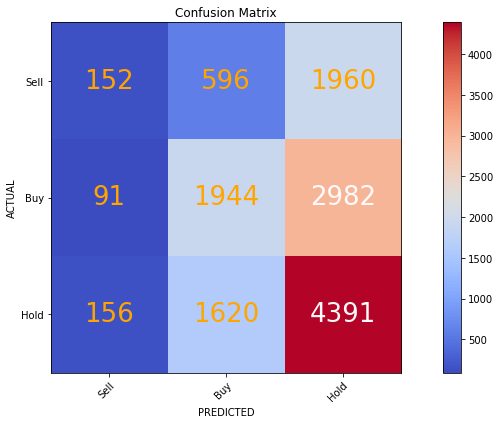

In [59]:
### Printing out evaluation metrics
# Classifier predictions
pred = clf.predict(X_test)

#Printing out results
report = classification_report(y_test, pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

### Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax
  
### Running the Confusion Matrix
plot_confusion_matrix(y_test, pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()